In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv("phishing-dataset-variation.csv")

In [6]:
# 3. Separate features and target variable
X = df.drop(columns=["phishing"])  # Drop the target column
y = df["phishing"]  # Target variable

In [7]:
# Impute missing values in features using the median strategy
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [8]:
# Verify that missing values are handled
print("Missing values after preprocessing:")
print(X.isnull().sum())

Missing values after preprocessing:
qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
tls_ssl_certificate     0
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
Length: 111, dtype: int64


In [9]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9706711787930062
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11600
           1       0.96      0.96      0.96      6130

    accuracy                           0.97     17730
   macro avg       0.97      0.97      0.97     17730
weighted avg       0.97      0.97      0.97     17730



In [12]:
# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9624365482233502
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11600
           1       0.94      0.95      0.95      6130

    accuracy                           0.96     17730
   macro avg       0.96      0.96      0.96     17730
weighted avg       0.96      0.96      0.96     17730



In [13]:
# Compare model performance using a bar chart
metrics = ['Precision', 'Recall', 'Accuracy']
rf_scores = [0.98, 0.98, rf_accuracy]
xgb_scores = [0.97, 0.97, xgb_accuracy]

In [14]:
x = np.arange(len(metrics))
bar_width = 0.3

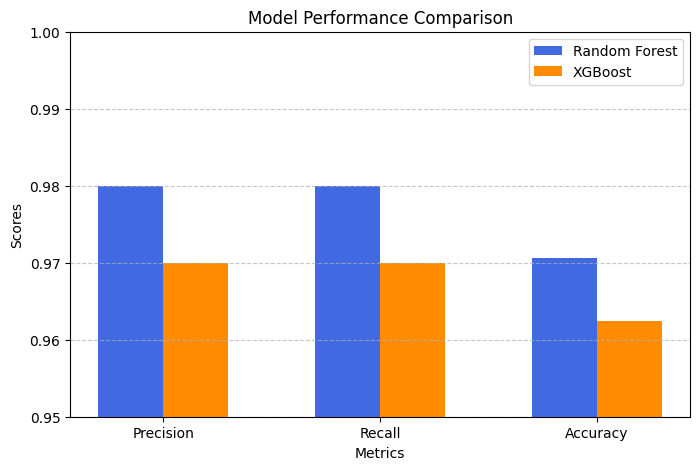

In [17]:
plt.figure(figsize=(8, 5))
plt.bar(x - bar_width/2, rf_scores, bar_width, label='Random Forest', color='royalblue')
plt.bar(x + bar_width/2, xgb_scores, bar_width, label='XGBoost', color='darkorange')
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0.95, 1)  # Focus on the relevant range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
